# Iimport libs

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
#for plotting distance matrix
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
import sklearn as sk
from sklearn.datasets import load_iris
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# svm imports
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from numpy import genfromtxt
import pandas as pd
import scipy as sc
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn import linear_model
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from scipy.linalg import norm

In [10]:
ls

moldeando.csv    paper1_cyt.pdf  paper3_cyt.pdf  stfow/
moldeando.ipynb  paper2_cyt.pdf  paper4_cyt.pdf


In [11]:
pwd

'/home/human/Dropbox/wef'

In [12]:
mold = pd.read_csv('/home/human/Dropbox/wef/stfow/stfow_en.csv', delimiter=',',header = 0)

In [13]:
mold.head()

,Timestamp,country,city,region,age_cat,gender,race,nationality,ed_qual,eploy_stat,...,workspace_transformation,education_system,immigrant_participation_economic_growth,actions2_gender_imbalance,gobernment_role,business_role,civil_soc_role,young_people_projects,Change_10,ten_workshift
0,2/5/2019 17:48:43,Nigeria,Abuja,Africa,30-39,Male,"Black Race, Igbo ethnicity",Nigerian,College,Entrepreneur,...,The impact will be mainly positive,Online education focused on specific skills,Diversity fosters economic growth,More promotion and support for women in STEM.,Update the education system so it includes mor...,Create opportunities for hands on paid interns...,Break down stereotypes and be more inclusive t...,NaN,NaN,NaN
1,2/16/2019 8:35:59,Nigeria,Abuja,Africa,30-39,Female,Igbo,Nigerian,College,Full-time employee,...,The impact will be mainly positive,Training and mentoring programs in the workplace,I don’t know,"Social benefits such as childcare, parental le...",Update the education system so it includes mor...,Increase workers’ social benefits.,Break down stereotypes and be more inclusive t...,No,Yes,NaN
2,2/24/2019 18:39:46,Nigeria,Abuja,Africa,21-29,Male,NaN,Nigerian,College,Entrepreneur,...,The impact will be mainly positive,Training and mentoring programs in the workplace,Diversity fosters economic growth,Inclusive work environment where all genders a...,Give assistance to unemployed people,Increase workers’ social benefits.,Break down stereotypes and be more inclusive t...,NaN,Yes,NaN
3,2/27/2019 11:01:59,Nigeria,Abuja,Africa,30-39,Male,African,Nigerian,College,Full-time employee,...,The impact will be mainly positive,Training and mentoring programs in the workplace,I don’t know,Inclusive work environment where all genders a...,"Create friendly policy regardless of race, bac...",Provide more trainings and mentoring programs.,Change cultural barriers that prevent people f...,NaN,No,Non-profit
4,1/24/2019 16:50:18,Ghana,Accra,Africa,21-29,Female,African,Kenyan,Masters Degree,Student and employee,...,The impact will be mainly positive,Training and mentoring programs in the workplace,Diversity fosters economic growth,More promotion and support for women in STEM.,Address how to adjust to rapid changes and inn...,Provide more trainings and mentoring programs.,Change cultural barriers that prevent people f...,NaN,NaN,NaN


### Select columns of interest

In [14]:
mold.columns

Index(['Timestamp', 'country', 'city', 'region', 'age_cat', 'gender', 'race',
       'nationality', 'ed_qual', 'eploy_stat', 'employ_sector', 'career_def',
       'fow_challenge', 'ed_prep', 'years_bef_tran', 'skill_trans',
       'skill_dev', 'workspace_transformation', 'education_system',
       'immigrant_participation_economic_growth', 'actions2_gender_imbalance',
       'gobernment_role', 'business_role', 'civil_soc_role',
       'young_people_projects', 'Change_10', 'ten_workshift'],
      dtype='object')

In [15]:
mold_red = mold[['age_cat','gender', 'ed_qual', 'eploy_stat', 'employ_sector', 'career_def', 'years_bef_tran', 'skill_dev', 'Change_10', 'ten_workshift']]

In [16]:
mold_red["count"] = 1

/home/human/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
mold_red.head()

,age_cat,gender,ed_qual,eploy_stat,employ_sector,career_def,years_bef_tran,skill_dev,Change_10,ten_workshift,count
0,30-39,Male,College,Entrepreneur,Software and computing,A lifestyle that involves a range of aspects i...,2 to 5 years,Change the education system to include the nec...,NaN,NaN,1
1,30-39,Female,College,Full-time employee,Health services,"A way to earn income via work, occupation or p...",2 to 5 years,Change the education system to include the nec...,Yes,NaN,1
2,21-29,Male,College,Entrepreneur,Digital marketing,A lifestyle that involves a range of aspects i...,2 to 5 years,Change the education system to include the nec...,Yes,NaN,1
3,30-39,Male,College,Full-time employee,Financial and professional services,An occupation to use my time productively.,5 to 10 years,Mentoring programs provided by the government ...,No,Non-profit,1
4,21-29,Female,Masters Degree,Student and employee,"Sustainability, conservation of natural resour...",A lifestyle that involves a range of aspects i...,5 to 10 years,Change the education system to include the nec...,NaN,NaN,1


### Visualization by quality of education and gender

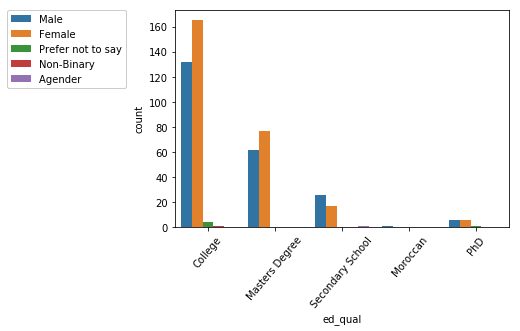

In [18]:
g = sns.countplot(mold_red.ed_qual, hue = "gender", data = mold_red)
for item in g.get_xticklabels():
    item.set_rotation(50)
plt.legend(bbox_to_anchor=(-0.5, 1), loc=2, borderaxespad=0.,framealpha=1, frameon=True)
plt.show()

### Visualization by gender and employ_sector

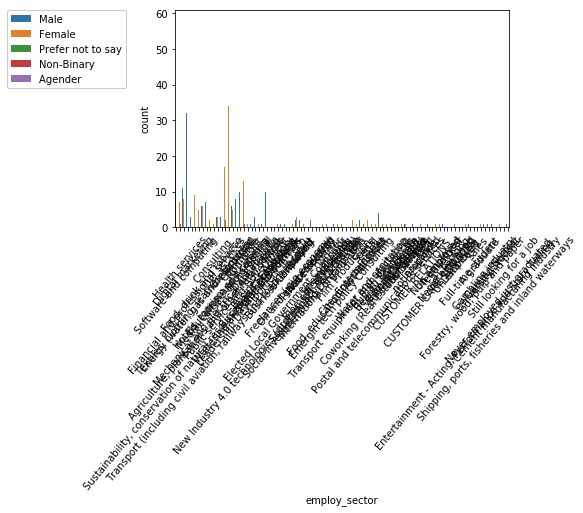

In [19]:
g = sns.countplot(mold_red.employ_sector, hue = "gender", data = mold_red)
for item in g.get_xticklabels():
    item.set_rotation(50)
plt.legend(bbox_to_anchor=(-0.5, 1), loc=2, borderaxespad=0.,framealpha=1, frameon=True)
plt.show()

### Visualization by gender and age category

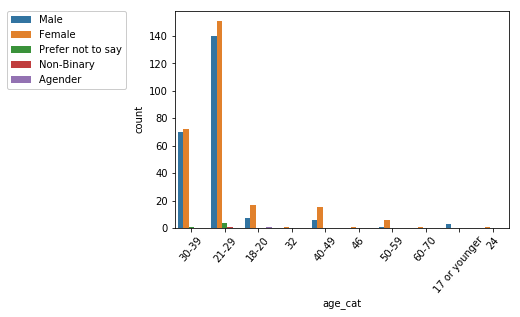

In [20]:
g = sns.countplot(mold_red.age_cat, hue = "gender", data = mold_red)
for item in g.get_xticklabels():
    item.set_rotation(50)
plt.legend(bbox_to_anchor=(-0.5, 1), loc=2, borderaxespad=0.,framealpha=1, frameon=True)
plt.show()

### Visualization by gender and 10-years workshift migration

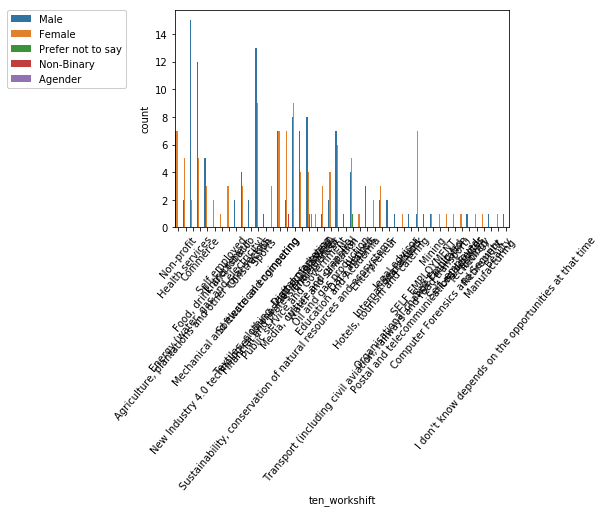

In [21]:
g = sns.countplot(mold_red.ten_workshift, hue = "gender", data = mold_red)
for item in g.get_xticklabels():
    item.set_rotation(50)
plt.legend(bbox_to_anchor=(-0.5, 1), loc=2, borderaxespad=0.,framealpha=1, frameon=True)
plt.show()

### Visualization by work migration in 10-years

No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

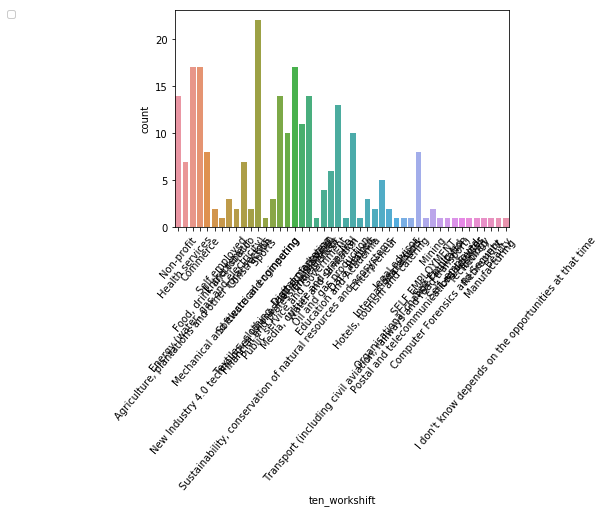

In [22]:
g = sns.countplot(mold_red.ten_workshift)
for item in g.get_xticklabels():
    item.set_rotation(50)
plt.legend(bbox_to_anchor=(-0.5, 1), loc=2, borderaxespad=0.,framealpha=1, frameon=True)
plt.show

### Visualization by gender and quality of education

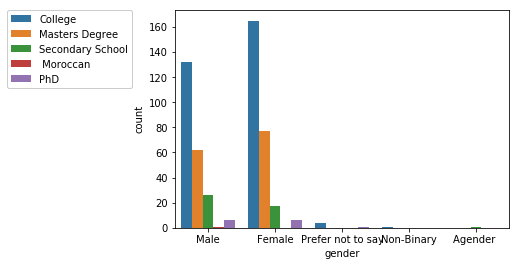

In [23]:
sns.countplot(mold_red.gender, hue = "ed_qual", data = mold_red)
plt.legend(bbox_to_anchor=(-0.5, 1), loc=2, borderaxespad=0.,framealpha=1, frameon=True)

In [24]:
gender_employsector = pd.pivot_table(data = mold_red, columns = "gender", index = "employ_sector", values = "count" , aggfunc= np.sum, fill_value=0 )

In [26]:
employstat_edqual = pd.pivot_table(data = mold_red, columns = "eploy_stat", index = "ed_qual", values = "count" , aggfunc= np.sum, fill_value=0 )

In [27]:
gender_employsector[["Female", "Male"]].head()

gender,Female,Male
employ_sector,,
A graduate,1,0
"Agriculture, plantations and other rural sectors",4,7
Beauty and Health,1,0
Biomedical research,1,0
Business Advisory,0,1


In [88]:
employ_sector_table = gender_employsector[(gender_employsector>10).values]

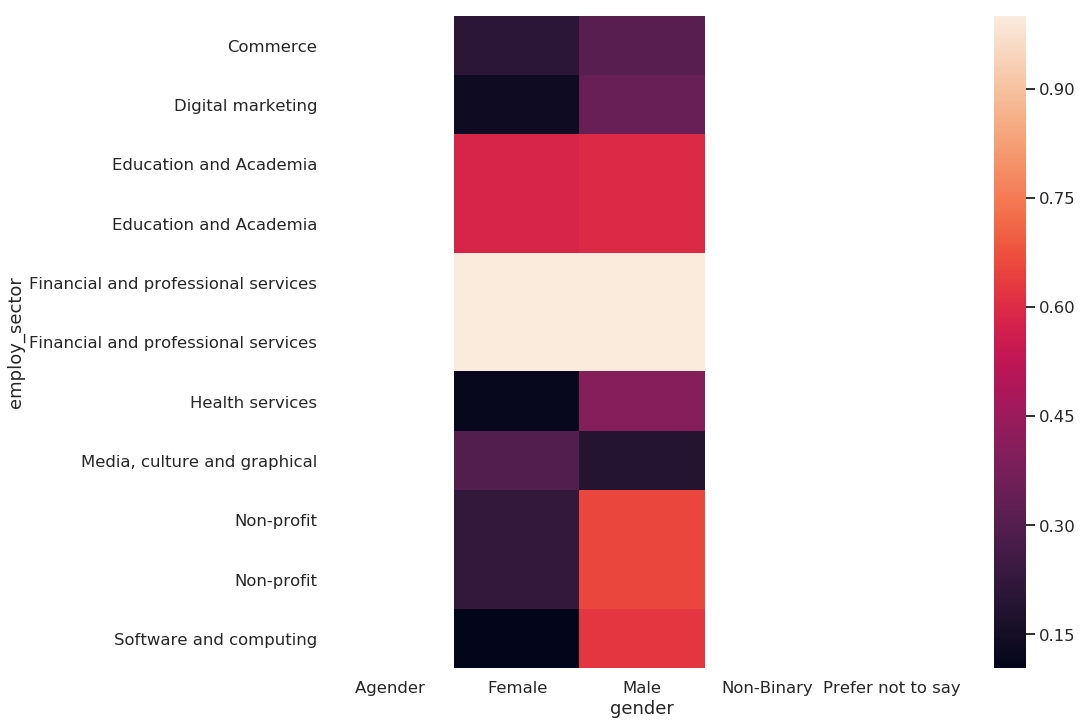

In [89]:
f, axarr = plt.subplots(1,1, squeeze = False)
f.set_size_inches(14,12)
sns.set_style("white")
sns.set_context("talk")
sns.heatmap(employ_sector_table[["Female", "Male"]]/employ_sector_table.max())
plt.show()

In [90]:
employ_male = gender_employsector[["Male"]][(gender_employsector[["Male"]]>10).values]

In [91]:
employ_female = gender_employsector[["Female"]][(gender_employsector[["Female"]]>10).values]

In [95]:
employ_gender_table = pd.concat([employ_male,employ_female], axis = 1). fillna(0)

/home/human/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [108]:
employ_gender_table.div(employ_gender_table.sum(axis=1), axis=0)

gender,Male,Female
Commerce,0.000000,1.000000
Digital marketing,1.000000,0.000000
Education and Academia,0.358491,0.641509
Financial and professional services,0.355556,0.644444
Health services,1.000000,0.000000
"Media, culture and graphical",0.000000,1.000000
Non-profit,0.617647,0.382353
Software and computing,1.000000,0.000000


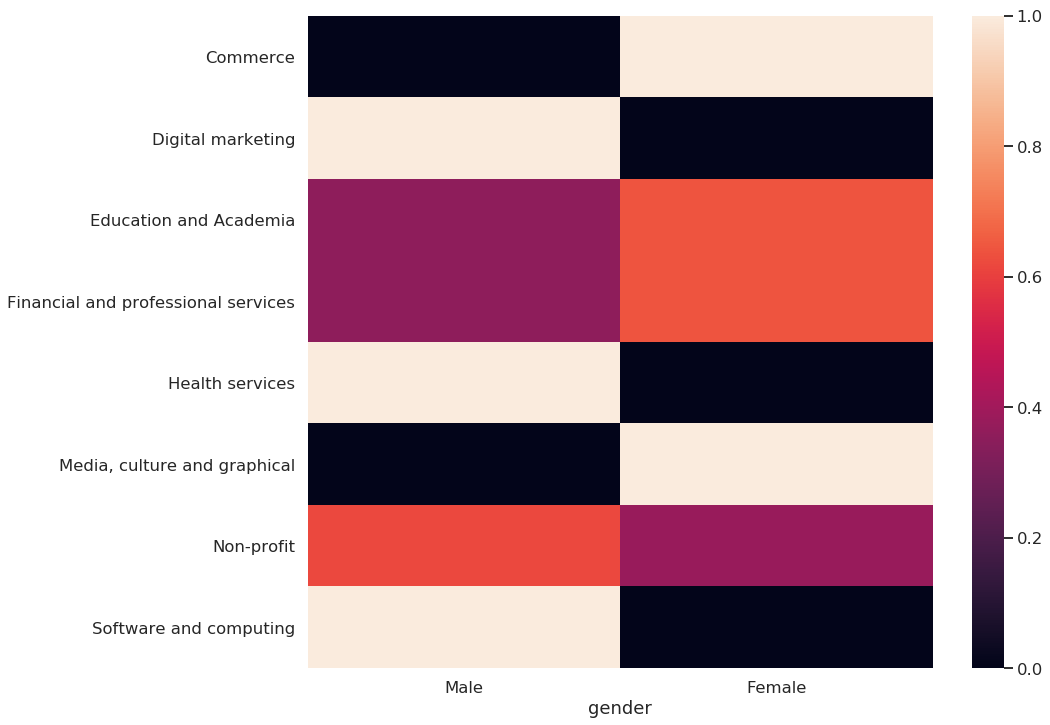

In [109]:
f, axarr = plt.subplots(1,1, squeeze = False)
f.set_size_inches(14,12)
sns.set_style("white")
sns.set_context("talk")
sns.heatmap(employ_gender_table.div(employ_gender_table.sum(axis=1), axis=0))
plt.show()

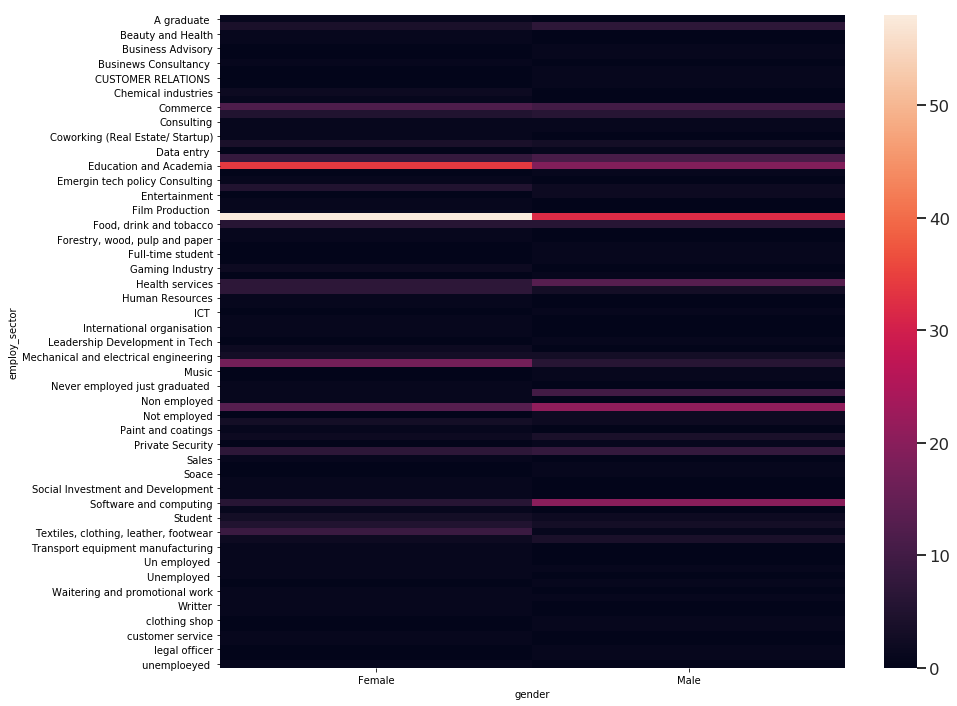

In [28]:
f, axarr = plt.subplots(1,1, squeeze = False)
f.set_size_inches(14,12)
sns.set_style("white")
sns.set_context("talk")
sns.heatmap(gender_employsector[["Female", "Male"]])
plt.show()

# Workshift migration analysis
An origin-destiny matrix is built indicating the actual job of people and the desired one in 10 years.

In [ ]:
workshift = pd.pivot_table(data = mold_red, columns = "ten_workshift", index = "employ_sector", values = "count" , aggfunc= np.sum, fill_value=0 )

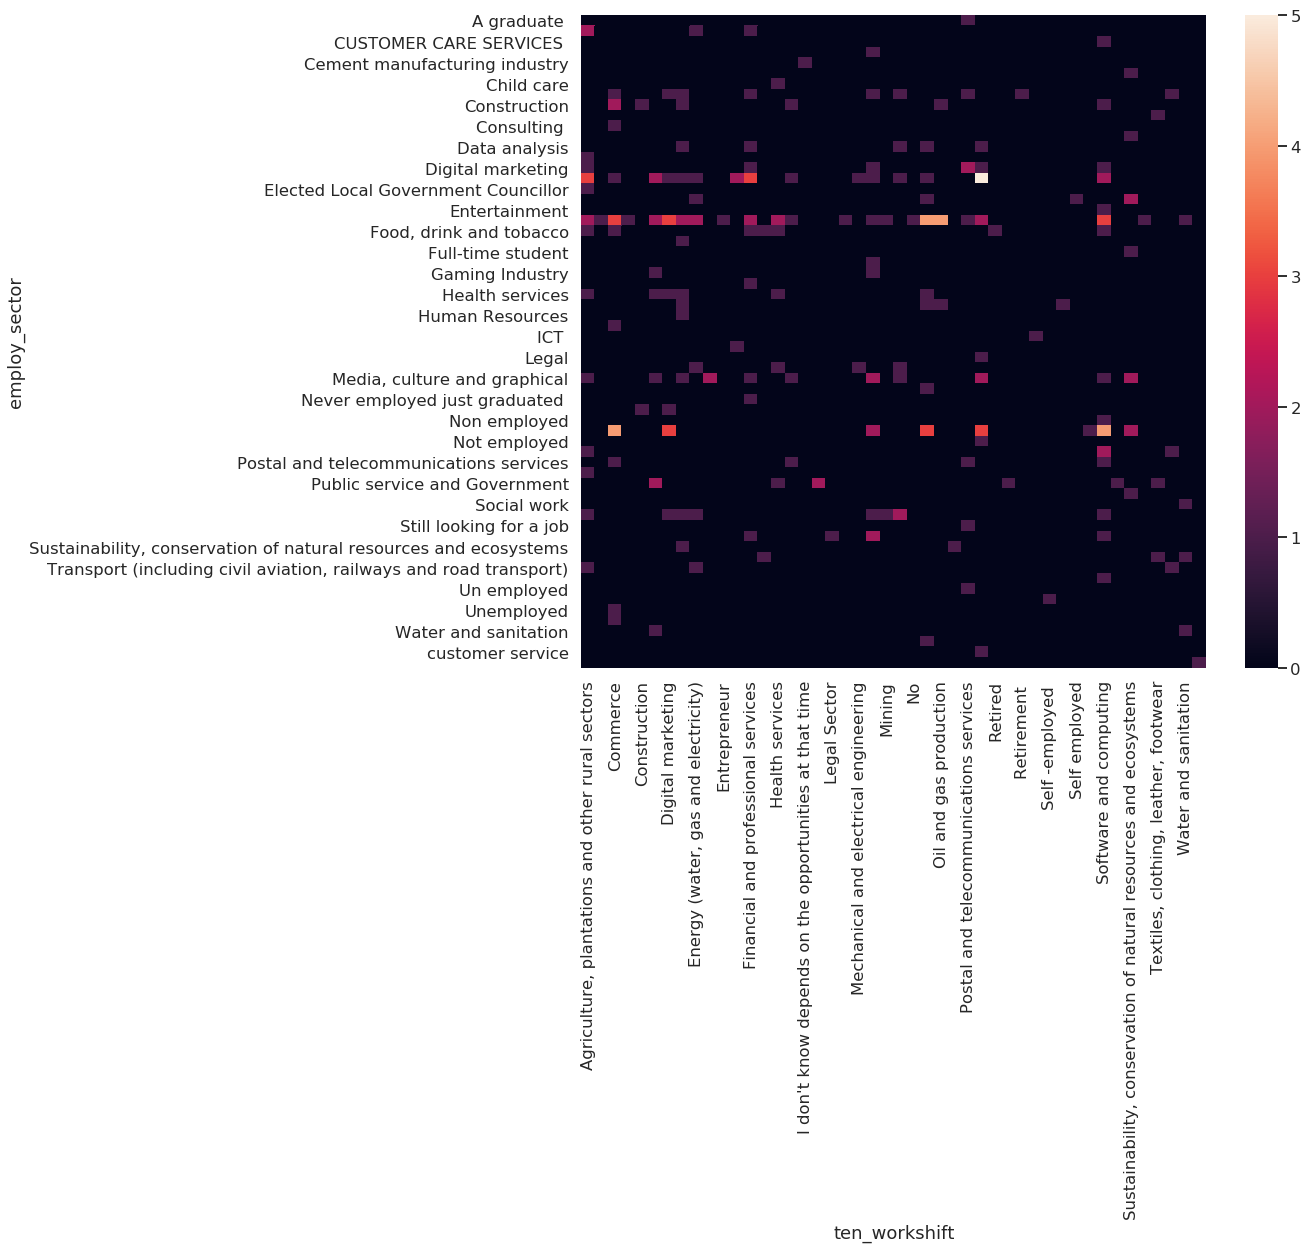

In [32]:
f, axarr = plt.subplots(1,1, squeeze = False)
f.set_size_inches(14,12)
sns.set_style("white")
sns.set_context("talk")
sns.heatmap(workshift)
plt.show()

In [64]:
major_migrators = workshift[workshift.sum(axis = 1)>5].sum(axis = 1)

In [75]:
workshift.loc[(workshift.sum(axis = 0) > 5).values]

ten_workshift,"Agriculture, plantations and other rural sectors",Beauty,Commerce,Computer Forensics and Security,Construction,Data analysis,Digital marketing,Education and Academia,"Energy (water, gas and electricity)",Enterpreneur,...,Self employed,Social work,Software and computing,Sports,"Sustainability, conservation of natural resources and ecosystems",Technology,"Textiles, clothing, leather, footwear","Transport (including civil aviation, railways and road transport)",Water and sanitation,legal advisor
employ_sector,,,,,,,,,,,,,,,,,,,,,
A graduate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CUSTOMER CARE SERVICES,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Chemical industries,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Child care,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Commerce,0,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
Construction,0,0,2,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
Data analysis,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Digital marketing,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
"Forestry, wood, pulp and paper",0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
#major_receivers = workshift[workshift.sum(axis = 0)>5].sum(axis = 0)
receivers = workshift.sum(axis = 0)
receivers[(receivers>5).values]

ten_workshift
Agriculture, plantations and other rural sectors                    17
Commerce                                                            17
Data analysis                                                       10
Digital marketing                                                   11
Education and Academia                                              13
Energy (water, gas and electricity)                                  8
Financial and professional services                                 14
Health services                                                      7
Media, culture and graphical                                        14
New Industry 4.0 technologies (drones, IoT, 3D printing)             7
Non-profit                                                          14
Oil and gas production                                               6
Postal and telecommunications services                               8
Public service and Government                                  

No handles with labels found to put in legend.


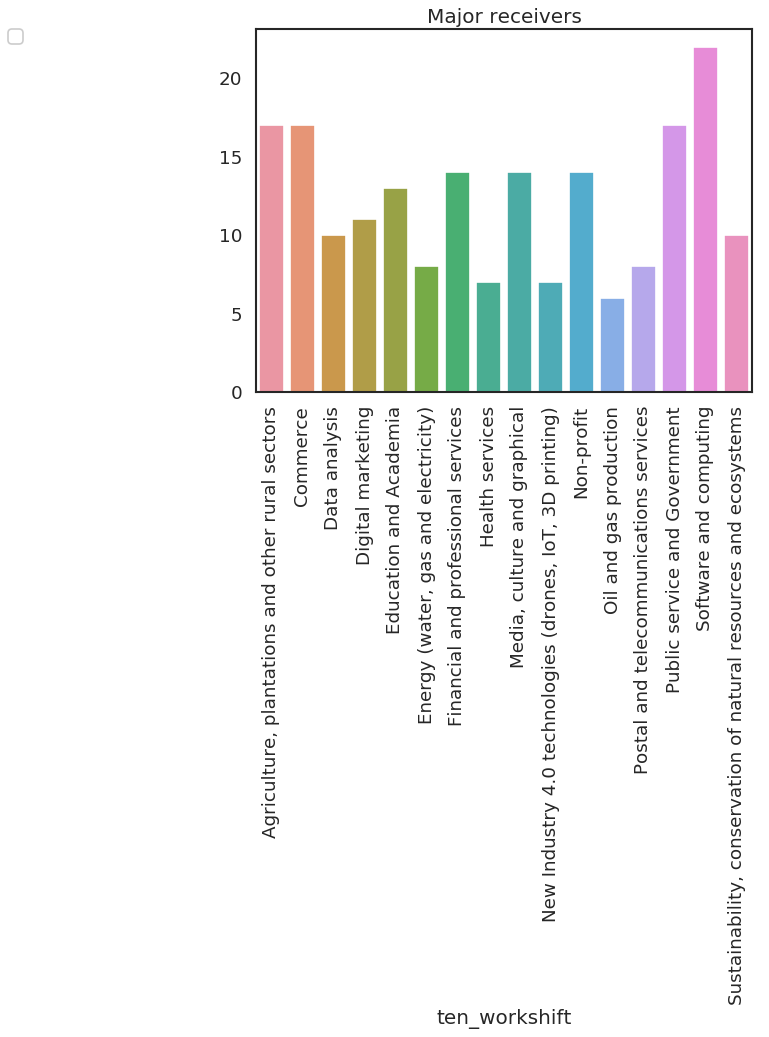

In [142]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
g = sns.barplot(x = receivers[(receivers>5).values].index, y = receivers[(receivers>5).values])
for item in g.get_xticklabels():
    item.set_rotation(90)
plt.legend(bbox_to_anchor=(-0.5, 1), loc=2, borderaxespad=0.,framealpha=1, frameon=True)
plt.title("Major receivers")
plt.show()

In [132]:
#major_receivers = workshift[workshift.sum(axis = 0)>5].sum(axis = 0)
migrators = workshift.sum(axis = 1)
migrators[(migrators>5).values]

employ_sector
Commerce                                9
Construction                            7
Digital marketing                       7
Education and Academia                 26
Financial and professional services    42
Food, drink and tobacco                 7
Health services                         6
Media, culture and graphical           15
Non-profit                             22
Public service and Government           8
Software and computing                  9
dtype: int64

No handles with labels found to put in legend.


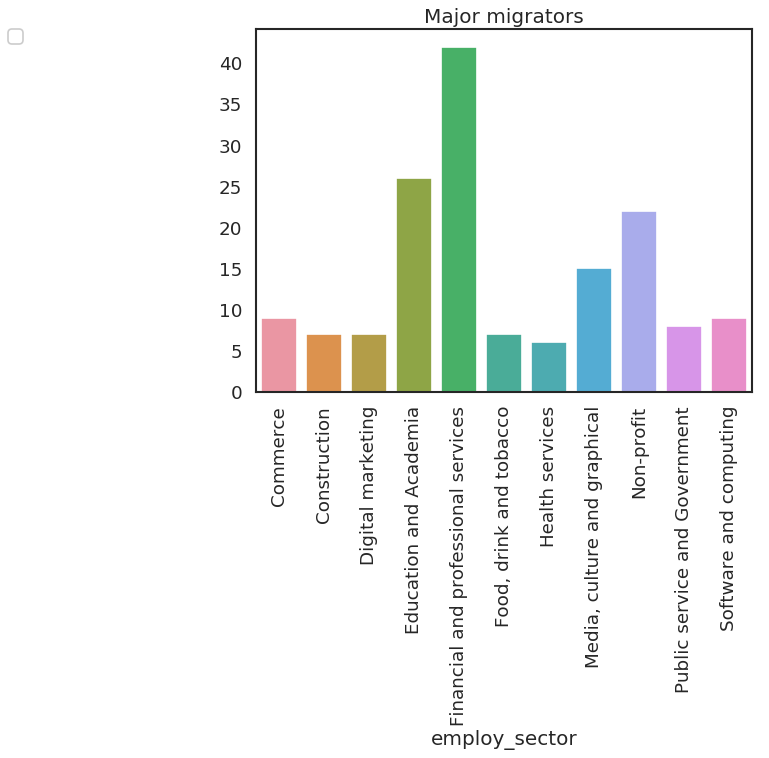

In [143]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
g = sns.barplot(x = migrators[(migrators>5).values].index, y = migrators[(migrators>5).values])
for item in g.get_xticklabels():
    item.set_rotation(90)
plt.legend(bbox_to_anchor=(-0.5, 1), loc=2, borderaxespad=0.,framealpha=1, frameon=True)
plt.title("Major migrators")
plt.show()

In [116]:
workshift.shape

(62, 46)

In [61]:
major_workshift = workshift.loc[workshift.sum(axis = 1)>5,workshift.sum(axis = 0)>5]

In [ ]:
major_workshift.div(major_workshift.sum(axis=1), axis=0)

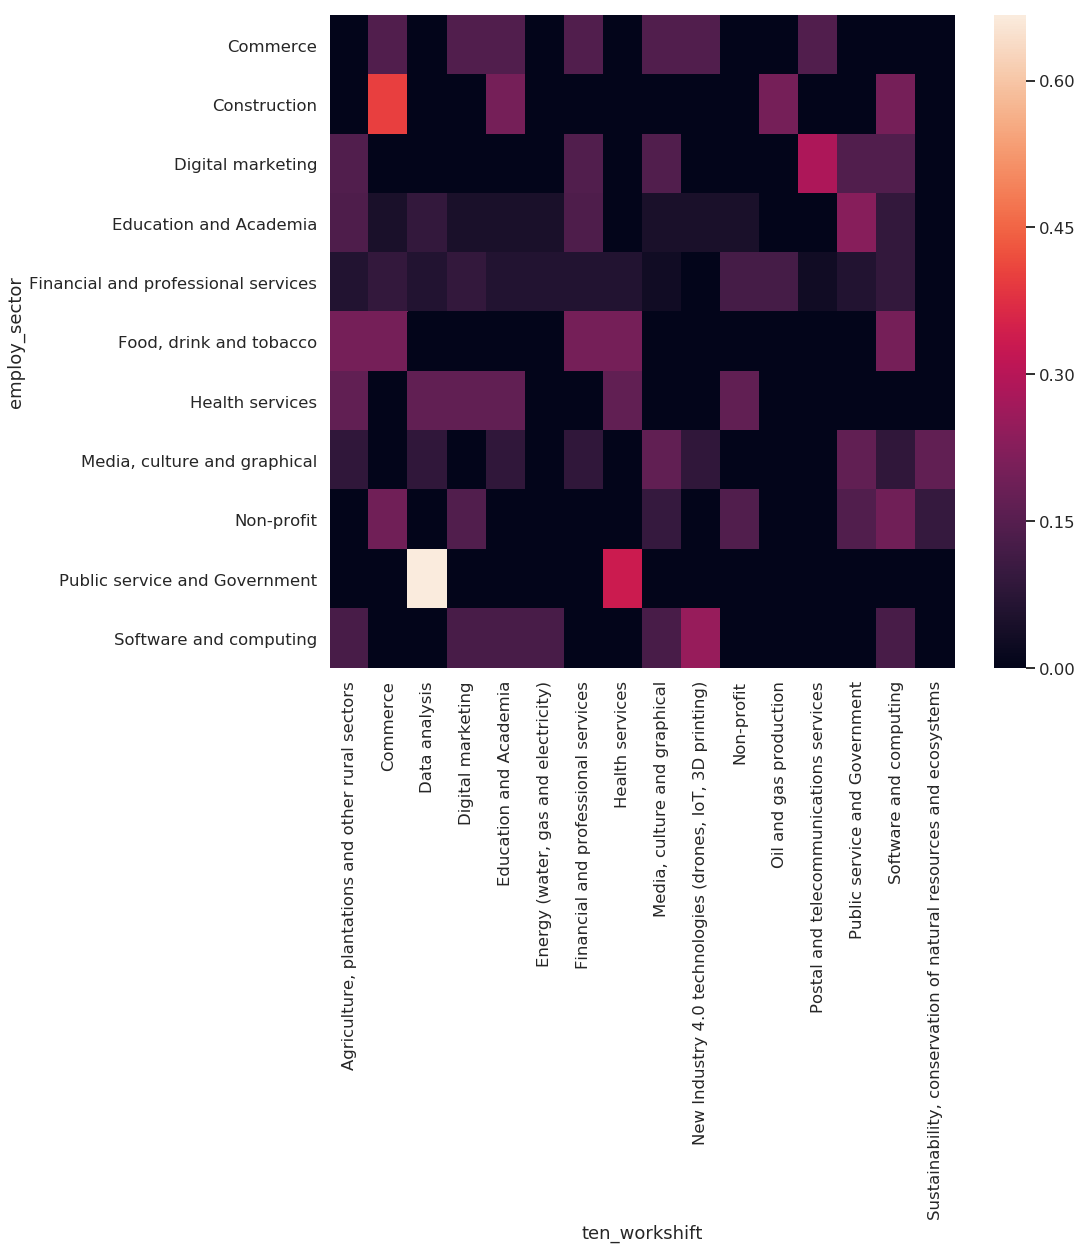

In [111]:
f, axarr = plt.subplots(1,1, squeeze = False)
f.set_size_inches(14,12)
sns.set_style("white")
sns.set_context("talk")
sns.heatmap(major_workshift.div(major_workshift.sum(axis=1), axis=0))
plt.show()

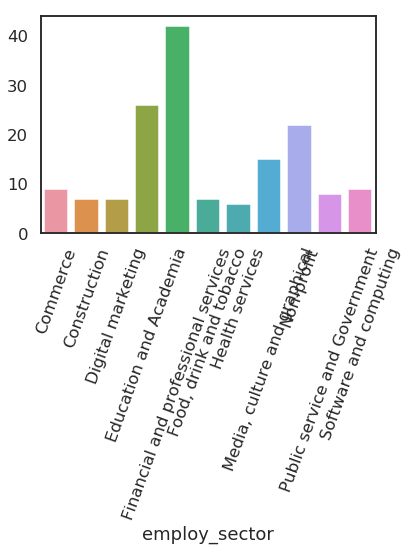

In [54]:
g = sns.barplot(x = major_workshift.index, y = major_workshift)
for item in g.get_xticklabels():
    item.set_rotation(70)
plt.show()

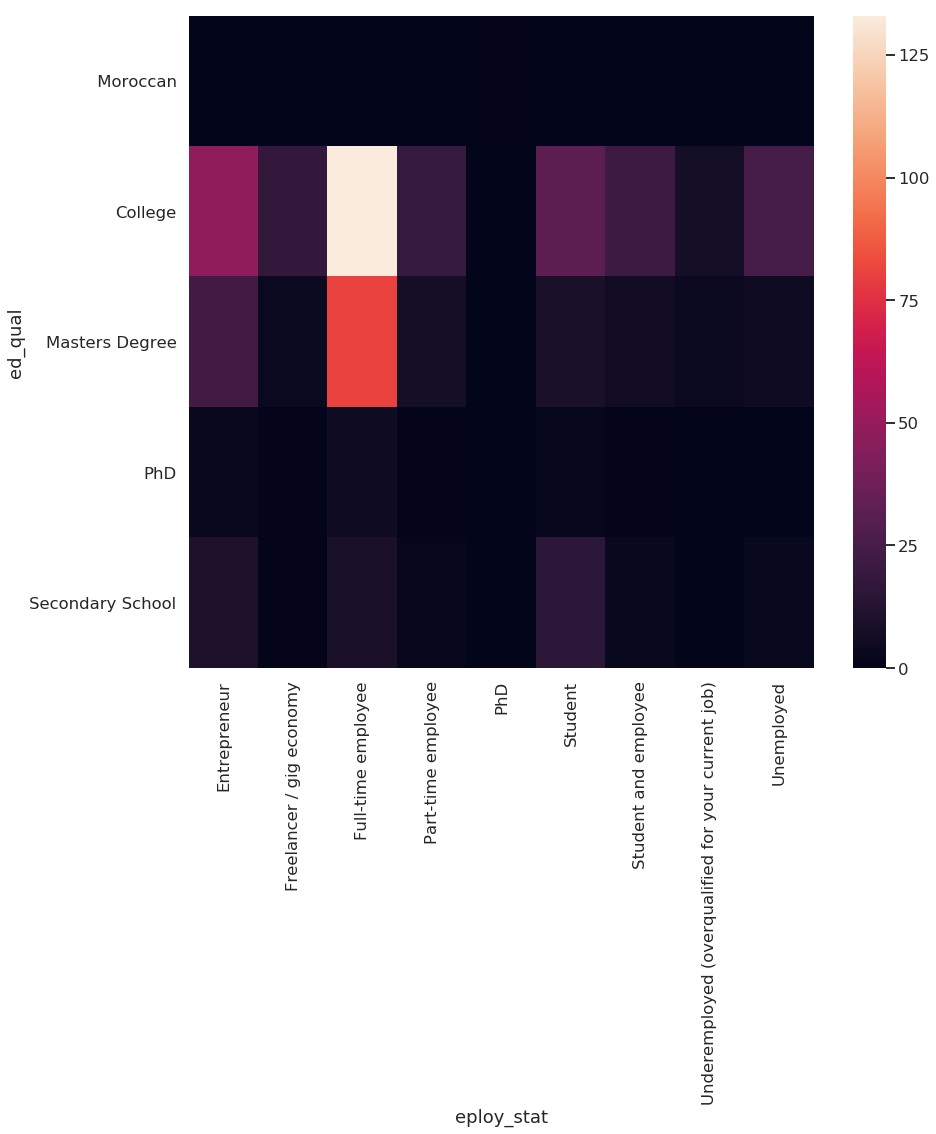

In [30]:
f, axarr = plt.subplots(1,1, squeeze = False)
f.set_size_inches(14,12)
sns.set_style("white")
sns.set_context("talk")
sns.heatmap(employstat_edqual)
plt.show()